In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

from custom_libs import db
from custom_libs import preprocessing
from custom_libs import classification
from custom_libs import dump

In [2]:
df = db.get_dataset("chat_dataset")
df.head(2)

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative


In [3]:
x_column_name = "message"
x_column_cleaned_name = x_column_name + "_clean"

In [4]:
proprocessing_function = preprocessing.preprocess_text
preprocessing.preprocess_dataframe(df, x_column_name, x_column_cleaned_name, proprocessing_function)
df.head(2)

,message,sentiment,message_clean
0,I really enjoyed the movie,positive,really enjoy movie
1,The food was terrible,negative,food terrible


In [5]:
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEGATIVE if x == "negative" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.POSITIVE if x == "positive" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEUTRAL if x == "neutral" else x)

df.sample(5)

,message,sentiment,message_clean
130,The game was boring,Negative,game boring
346,I'm just doing some work from home today ð»,Neutral,work home today
166,I'm undecided about this,Neutral,undecided
213,The performance was average,Neutral,performance average
83,The food was not very good,Negative,food good


In [6]:
# classification.append_sentiment_for_each_row(df, x_column_cleaned_name, new_column_name='sentiment')
# df.head(3)

In [7]:
X, y = df[x_column_cleaned_name], df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
vectorizers = list()
vectorizers.append(CountVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2)))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3)))

models = [PassiveAggressiveClassifier, LogisticRegression, MultinomialNB, SVC]

classification.test_classifiers(models, vectorizers, x_train, x_test, y_train, y_test)

Accuracy for PassiveAggressiveClassifier with vectorizer 0: 0.7350427350427351
Accuracy for PassiveAggressiveClassifier with vectorizer 1: 0.7350427350427351
Accuracy for PassiveAggressiveClassifier with vectorizer 2: 0.7350427350427351
Accuracy for PassiveAggressiveClassifier with vectorizer 3: 0.7863247863247863
Accuracy for PassiveAggressiveClassifier with vectorizer 4: 0.7777777777777778


Accuracy for LogisticRegression with vectorizer 0: 0.8205128205128205
Accuracy for LogisticRegression with vectorizer 1: 0.7863247863247863
Accuracy for LogisticRegression with vectorizer 2: 0.7863247863247863
Accuracy for LogisticRegression with vectorizer 3: 0.7777777777777778
Accuracy for LogisticRegression with vectorizer 4: 0.7863247863247863


Accuracy for MultinomialNB with vectorizer 0: 0.7692307692307693
Accuracy for MultinomialNB with vectorizer 1: 0.7264957264957265
Accuracy for MultinomialNB with vectorizer 2: 0.7264957264957265
Accuracy for MultinomialNB with vectorizer 3: 0.73504273

Accuracy: 0.8205128205128205
Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.63      0.72        30
     Neutral       0.79      0.93      0.85        54
    Positive       0.87      0.82      0.84        33

    accuracy                           0.82       117
   macro avg       0.83      0.79      0.81       117
weighted avg       0.82      0.82      0.82       117

Confusion matrix, without normalization


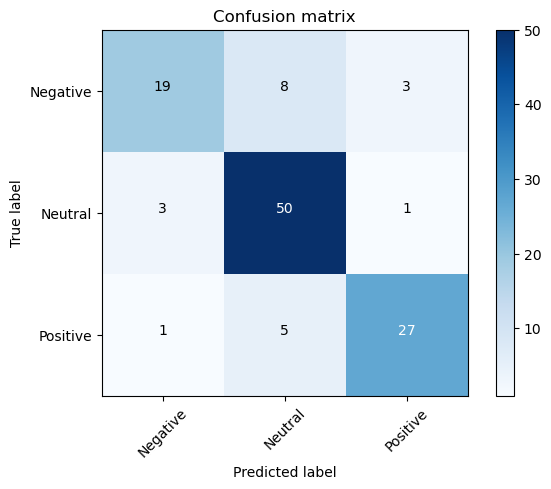

In [9]:
# Best combination of model and vectorizer
vectorizer = CountVectorizer(stop_words='english')
x_train_trasformed = vectorizer.fit_transform(x_train)
x_test_trasformed = vectorizer.transform(x_test)

class_names = classification.Sentiment.get_all()
model = classification.test_classifier(LogisticRegression, x_train_trasformed, x_test_trasformed, y_train, y_test, class_names)

In [10]:
dump.save_model(model, "model_chat")
dump.save_vectorizer(vectorizer, "vectorizer_chat")

Saving model at: dump_models/model_chat.pkl
Saving vectorizer at: dump_models/vectorizer_chat.pkl
